## **Proyecto 02**

*Profesora*: M. Sc. Liliana Millán Núñez

*Materia*: Minería de datos

*Alumnos*: Alfredo Castro Alducin, Pablo Barranco Soto

*CC.UU.*: 173350 ,151528 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Cargamos nuestros datos 
data = pd.read_csv("data/subset_bakery.csv")

# Semilla 
np.random.seed(2020)

# Preguntas EDA

##### 1. ¿Cuál es el producto que más se vende?

In [3]:
ventas=data.groupby(['item'], as_index=False)['transaction']\
.nunique()\
.rename(columns={'transaction': 'count'})\
.sort_values(by="count", ascending=False)

ventas[:1]

,item,count
4,Coffee,4528


El producto que más se vende es el _Coffee_ , con $4528$ transacciones registradas

##### 2. Genera una gráfica de barras que contenga los 10 productos más populares ordenados de mayor a menor popularidad, donde popularidad es el conteo del número de transacciones en el que aparecieron.

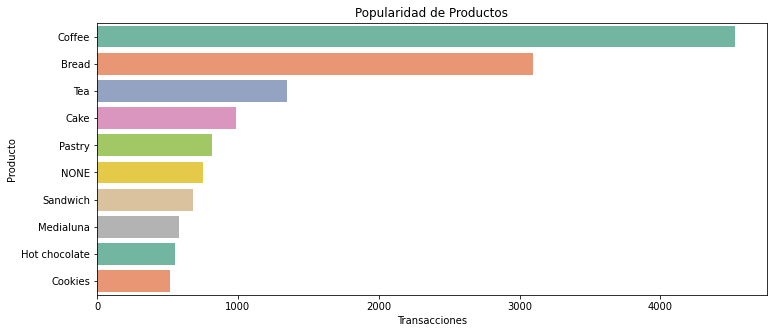

In [4]:
top10=ventas[:10]

plt.figure(figsize=(12, 5))
sns.barplot(data=top10,x='count',y='item', palette = 'Set2').set_title('Popularidad de Productos')
plt.ylabel('Producto')
plt.xlabel('Transacciones')
plt.show()

Podemos ver que los productos mas populares fueron _Coffe_ , _Bread_ y _Tea_. Mientras que los menos populares fueron _Medialuna_ , _Hot_ _chocolate_ y _Cookies_ .

##### 3. ¿En qué día de los que tienes en tu dataset se compra más Hot chocolate?

In [5]:
hc=data[data.item=='Hot chocolate']
hc.groupby(['date'], as_index=False)['transaction']\
.count()\
.rename(columns={'transaction': 'count'})\
.sort_values(by="count", ascending=False)[:1]

,date,count
53,2016-12-24,14


El día que mas se compro _Hot chocholate_ fue el $2016/12/24$, con un total de $14$.


##### 4. Genera un histograma con el número de items que tienes por ticket, ¿cuántos items tienen la mayoría de los tickets?

In [6]:
frequency = data.groupby(['transaction'], as_index=False)['item']\
.count()\
.rename(columns={'item': 'NItem'})\
.sort_values(by="NItem", ascending=False)

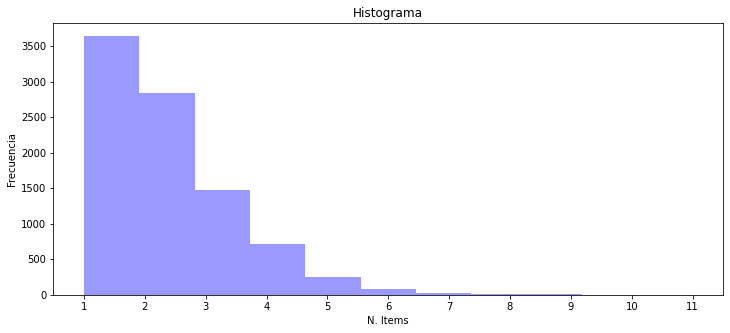

In [7]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12, 5))
sns.distplot(a=frequency.NItem,hist=True, bins = 11,kde = False, color = 'b')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.title('Histograma')
plt.ylabel('Frecuencia')
plt.xlabel('N. Items')
plt.show()

Podemos ver que la mayoria de los tickets tienen 1 producto.

##### 5. ¿Cuál es el ticket con mayor cantidad de productos, cuáles son esos productos?

In [8]:
ticket_mayor = int(frequency[:1].transaction)
data[data.transaction==ticket_mayor]

,date,time,transaction,item
11857,2017-02-09,13:44:56,6279,Juice
11858,2017-02-09,13:44:56,6279,Toast
11859,2017-02-09,13:44:56,6279,Sandwich
11860,2017-02-09,13:44:56,6279,Sandwich
11861,2017-02-09,13:44:56,6279,Tea
11862,2017-02-09,13:44:56,6279,Coffee
11863,2017-02-09,13:44:56,6279,Cookies
11864,2017-02-09,13:44:56,6279,Cookies
11865,2017-02-09,13:44:56,6279,Alfajores
11866,2017-02-09,13:44:56,6279,Alfajores


In [9]:
print('Los productos comprados fueron: {}.' .format(data['item'][data.transaction==6279].unique()))

Los productos comprados fueron: ['Juice' 'Toast' 'Sandwich' 'Tea' 'Coffee' 'Cookies' 'Alfajores'
 'Hot chocolate'].


# Preguntas a-priori

* Utilizando el algoritmo A-priori genera reglas de asociación a través de las transacciones con las que cuentas.
* Ocupa un mínimo de soporte de 5%.
* Generando reglas de asociación, ocupando un threshold mínimo de 30% de confianza

In [10]:
# list of lists 
txs = data.groupby(['transaction'])['item'].apply(lambda x: list(np.unique(x)))
txs_list = txs.values.tolist()

In [11]:
te = TransactionEncoder()
txs_formatted = te.fit(txs_list).transform(txs_list)

In [12]:
df = pd.DataFrame(txs_formatted, columns=te.columns_)
df.head()

,Alfajores,Bread,Brownie,Cake,Coffee,Cookies,Farm House,Hot chocolate,Juice,Medialuna,Muffin,NONE,Pastry,Sandwich,Scandinavian,Scone,Soup,Tea,Toast,Truffles
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [13]:
apriori_df = apriori(df, min_support=0.05, use_colnames=True)
apriori_df.sort_values(by='support', ascending=False)

,support,itemsets
2,0.499504,(Coffee)
0,0.341644,(Bread)
9,0.148924,(Tea)
1,0.108439,(Cake)
10,0.093988,"(Bread, Coffee)"
7,0.089906,(Pastry)
6,0.083067,(NONE)
8,0.075014,(Sandwich)
5,0.064534,(Medialuna)
4,0.060894,(Hot chocolate)


##### 7. ¿Cuáles son los 5 item con mayor soporte? ¿Cuánto tienen de soporte?

Los items con mayor soporte son:

In [14]:
apriori_df.sort_values(by='support', ascending=False).head()

,support,itemsets
2,0.499504,(Coffee)
0,0.341644,(Bread)
9,0.148924,(Tea)
1,0.108439,(Cake)
10,0.093988,"(Bread, Coffee)"


##### 8. ¿Cuál es la regla de asociación con mayor confianza? Interpreta la confianza obtenida

In [15]:
rules_df = association_rules(apriori_df, metric="confidence", min_threshold=0.3)
rules_df[:1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.108439,0.499504,0.057143,0.526958,1.054964,0.002977,1.058039


La regla de asociación con mayor confianza es _Cake_ $\rightarrow$ _Coffee_ con un valor de $0.526$, lo cual quiere decir que la probabilidad de que _Coffee_ este presente dado que _Cake_ esta presente es de $0.526$.

##### 9. ¿Cuál es la regla de asociación con menor confianza? Interpreta la confianza obtenida. ¿Qué estrategia recomiendas a negocio para aumentar la métrica de confianza?

In [16]:
rules_df[-1:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Tea),(Coffee),0.148924,0.499504,0.052068,0.34963,0.699954,-0.02232,0.769556


La regla de asociación con menor confianza es _Tea_ $\rightarrow$ _Coffee_.

* Interpretación: la probabilidad de que _Coffee_ este presente dado que _Tea_ esta presente es de  $0.349$.
* Estreategia recomendada a negocio: En la compra de un _Café_ , tienes un 20% de descuento en la compra de un _Té_.

##### 10. Genera un scatterplot que tenga soporte en el eje x y confianza en el eje y coloreando por lift. ¿Cuál es la sección en la que deberíamos concentrarnos? Indica el mínimo de lift y mínimo de soporte. ¿Qué rango de porcentaje de confianza tienen esas reglas?

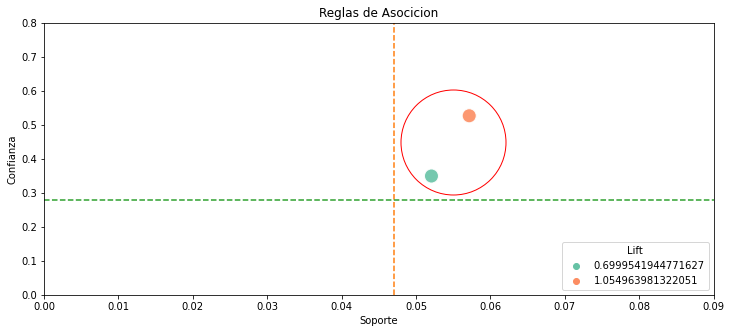

In [17]:
plt.figure(figsize=(12, 5))
axes = plt.axes()
sns.scatterplot(x="support", y="confidence", hue = "lift" ,s = 200, alpha = .9, palette = 'Set2',data=rules_df)
axes.set_ylim([0, .8])
axes.set_xlim([0,.09])
axes.plot([.055],[.45],'o',ms=105,mec='r',mfc='none')
plt.plot(np.repeat(0.047,16),np.arange(0,1.6,.1),'--')
plt.plot(np.arange(0,.1,.01), np.repeat(0.28,10),'--')
plt.legend(loc="lower right", title='Lift')
plt.title("Reglas de Asocicion")
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.show()

Deberiamos de concentrarnos en la sección dentro del circulo. Dado que son pocas reglas de asociación la grafica no aporta mucha información. El minimo confianza seria $0.28$ y el minmo soporte $0.47$. El rango de confianza de estas reglas va desde $\approx (0.34,.52)$.